In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [19]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [20]:
# 3. 시퀀스 생성
window = 24
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [21]:
# 3-1. train/test 분할
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
# === LSTM 모델 ===
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0422
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0063
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0067
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0051
Epoch 16/

In [29]:
# LSTM 예측
pred_lstm = lstm_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [24]:
# === RNN 모델 ===
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4138
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010   
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.6785e-04
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

In [25]:
# RNN 예측
pred_rnn = rnn_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


In [30]:
# LSTM 성능
mse_lstm = mean_squared_error(y_test, pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, pred_lstm)
r2_lstm = r2_score(y_test, pred_lstm)

print("LSTM 성능")
print(f"MSE: {mse_lstm:.6f}")
print(f"RMSE: {rmse_lstm:.6f}")
print(f"MAE: {mae_lstm:.6f}")
print(f"R²: {r2_lstm:.4f}")

LSTM 성능
MSE: 0.008117
RMSE: 0.090093
MAE: 0.071261
R²: 0.5420


In [31]:
# RNN 성능
mse_rnn = mean_squared_error(y_test, pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, pred_rnn)
r2_rnn = r2_score(y_test, pred_rnn)

print("RNN 성능")
print(f"MSE: {mse_rnn:.6f}")
print(f"RMSE: {rmse_rnn:.6f}")
print(f"MAE: {mae_rnn:.6f}")
print(f"R²: {r2_rnn:.4f}")

RNN 성능
MSE: 0.001755
RMSE: 0.041895
MAE: 0.035036
R²: 0.9010


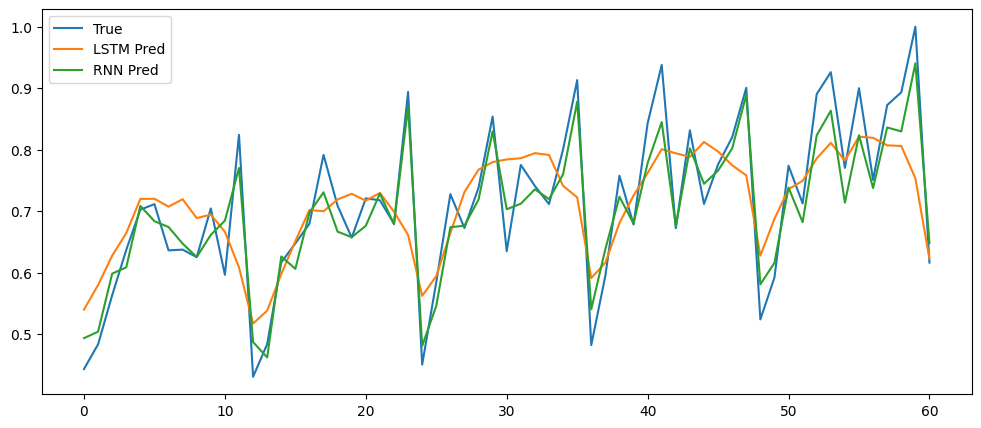

In [32]:
# === 시각화 ===
plt.figure(figsize=(12,5))
plt.plot(y_test, label='True')
plt.plot(pred_lstm, label='LSTM Pred')
plt.plot(pred_rnn, label='RNN Pred')
plt.legend()
plt.show()